In [4]:
using Distributions, Plots, StatsPlots
using Gen

In [7]:
@gen function heads()
    a = @trace(bernoulli(0.5), :a)
    b = @trace(bernoulli(0.5), :b)
    c = @trace(bernoulli(0.5), :c)
    return a + b + c
end;

In [8]:
function enumerate_heads()
    values_to_prob = Dict(0 => 0., 1 => 0., 2 => 0., 3 => 0.)
    a_values_to_prob = Dict(false => 0.5, true => 0.5)
    b_values_to_prob = Dict(false => 0.5, true => 0.5)
    c_values_to_prob = Dict(false => 0.5, true => 0.5)
    for a_val_prob in collect(a_values_to_prob)
        for b_val_prob in collect(b_values_to_prob)
            for c_val_prob in collect(c_values_to_prob)
                a = first(a_val_prob)
                b = first(b_val_prob)
                c = first(c_val_prob)
                a_prob = last(a_val_prob)
                b_prob = last(b_val_prob)
                c_prob = last(c_val_prob)
                values_to_prob[a+b+c] += a_prob*b_prob*c_prob
            end
        end
    end
    return values_to_prob
end;

In [6]:
values_to_prob = enumerate_heads()

Dict{Int64, Float64} with 4 entries:
  0 => 0.125
  2 => 0.375
  3 => 0.125
  1 => 0.375

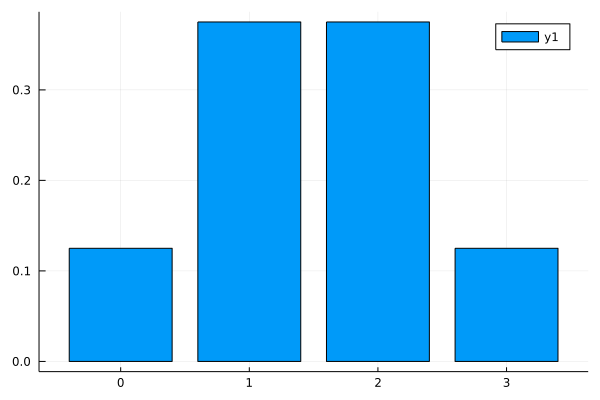

In [7]:
StatsPlots.bar(values_to_prob)

In [11]:
function enumerate_heads_with_condition(condition)
    values_to_prob = Dict(0 => 0., 1 => 0.)
    possible_values = [0,1  ]
    for a in collect(a_values_to_prob)
        for b_val_prob in collect(b_values_to_prob)
            for c_val_prob in collect(c_values_to_prob)
                a = first(a_val_prob)
                b = first(b_val_prob)
                c = first(c_val_prob)
                a_prob = last(a_val_prob)
                b_prob = last(b_val_prob)
                c_prob = last(c_val_prob)
                if condition(a+b+c)
                    values_to_prob[a] += a_prob*b_prob*c_prob
                end
            end
        end
    end
    prob_sum = 0
    for a in [0,1]
        prob_sum += values_to_prob[a]
    end
    for a in [0,1]
        values_to_prob[a] /= prob_sum
    end
    return values_to_prob
end;

In [14]:
values_to_prob = enumerate_heads_with_condition(sum -> sum >= 2)

Dict{Int64, Float64} with 2 entries:
  0 => 0.25
  1 => 0.75

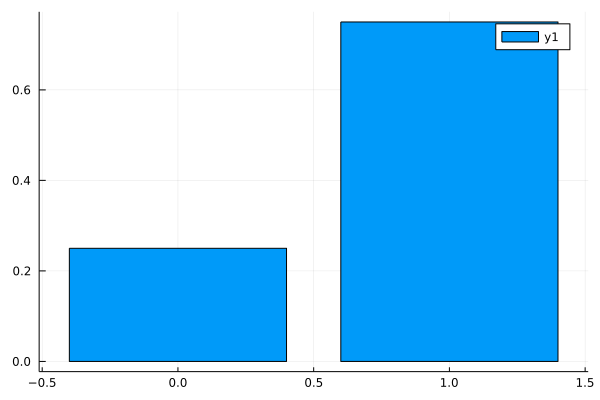

In [15]:
StatsPlots.bar(values_to_prob)

In [31]:
function enumerate_heads_with_condition_gen(condition)
    values_to_prob = Dict(0 => 0., 1 => 0.)
    possible_values = [0,1]
    for a in possible_values
        for b in possible_values
            for c in possible_values
                trace,weight = generate(heads,(), choicemap(:a => a, :b => b, :c => c))
                if condition(get_retval(trace))
                    values_to_prob[a] += exp(weight)
                end
            end
        end
    end
    prob_sum = 0
    for a in [0,1]
        prob_sum += values_to_prob[a]
    end
    for a in [0,1]
        values_to_prob[a] /= prob_sum
    end
    return values_to_prob
end;

In [30]:
values_to_prob = enumerate_heads_with_condition_gen(sum -> sum == 2)

weight = -2.0794415416798357weight = -2.0794415416798357weight = -2.0794415416798357weight = -2.0794415416798357weight = -2.0794415416798357weight = -2.0794415416798357weight = -2.0794415416798357weight = -2.0794415416798357

Dict{Int64, Float64} with 2 entries:
  0 => 0.333333
  1 => 0.666667

In [19]:
function enumerate_heads_with_factor_gen(condition)
    values_to_prob = Dict(0 => 0., 1 => 0.)
    possible_values = [0,1]
    for a in possible_values
        for b in possible_values
            for c in possible_values
                trace,weight = generate(heads,(), choicemap(:a => a, :b => b, :c => c))
                values_to_prob[a] += exp(weight) + exp(get_retval(trace))
            end
        end
    end
    prob_sum = 0
    for a in [0,1]
        prob_sum += values_to_prob[a]
    end
    for a in [0,1]
        values_to_prob[a] /= prob_sum
    end
    return values_to_prob
end;

In [23]:
values_to_prob = enumerate_heads_with_factor_gen(sum -> sum == 2)

Dict{Int64, Float64} with 2 entries:
  0 => 0.27335
  1 => 0.72665